# Downloading Data

In [1]:
!gdown 1clZX-lV_MLxKHSyeyTheX5OCQtNCUcqT

Downloading...
From: https://drive.google.com/uc?id=1clZX-lV_MLxKHSyeyTheX5OCQtNCUcqT
To: /content/ninjacart_data.zip
100% 275M/275M [00:08<00:00, 32.0MB/s]


# unzip

In [2]:
%%time 

!unzip -q /content/ninjacart_data.zip

 # Importing common libraries

In [3]:

%%time

import os
import glob
import random
import numpy as np
import pandas as pd
import sklearn.metrics as metrics
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Import tensorflow and its modules
import tensorflow as tf
from tensorflow import keras # this allows <keras.> instead of <tf.keras.>
from tensorflow.keras import layers # this allows <layers.> instead of <tf.keras.layers.>
tf.keras.utils.set_random_seed(111) # set random seed

# To supress any warnings during the flow
import warnings
warnings.filterwarnings('ignore')

CPU times: user 3.41 s, sys: 453 ms, total: 3.86 s
Wall time: 5.54 s


In [ ]:
# train data distribution

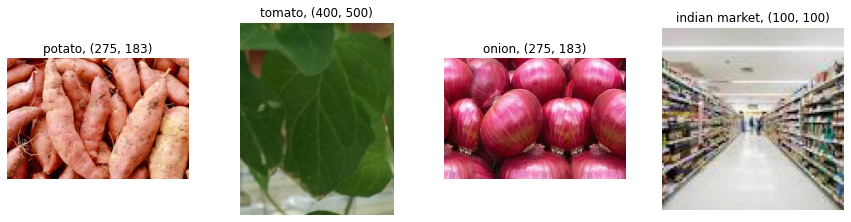

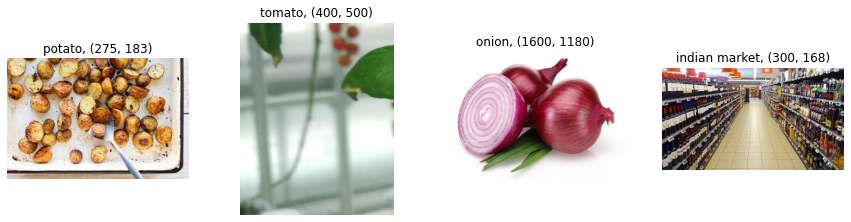

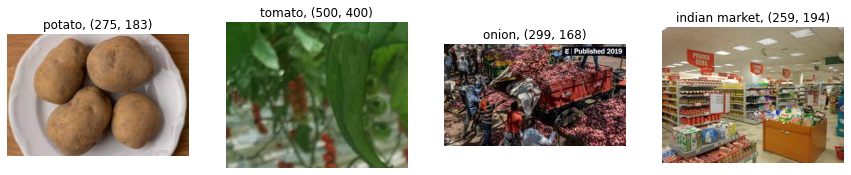

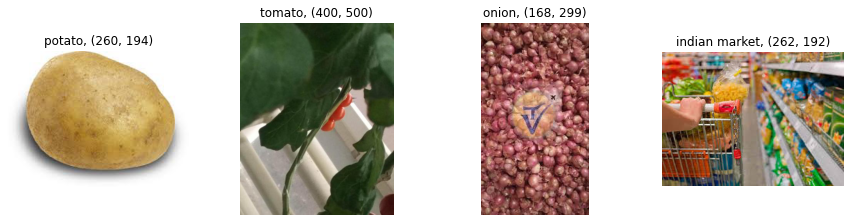

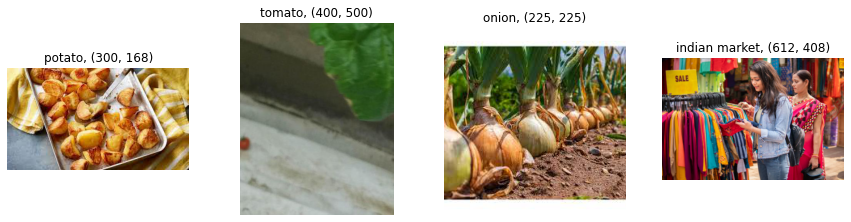




Count of training samples per class:
            class  count
0         potato    898
1         tomato    789
2          onion    849
3  indian market    599



CPU times: user 2.95 s, sys: 392 ms, total: 3.34 s
Wall time: 3.49 s


<Axes: title={'center': 'Training Data Count per class'}, xlabel='class'>

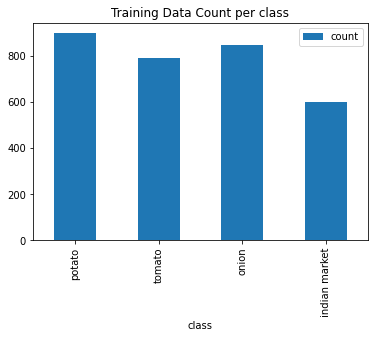

In [10]:
%%time 

class_dirs_train = os.listdir("ninjacart_data/train") # list all directories inside "train" folder
image_dict_train = {} # dict to store image array(key) for every class(value)
count_dict_train = {} # dict to store count of files(key) for every class(value)

for _ in range(5):
  # iterate over all class_dirs
  for cls in class_dirs_train:
      # get list of all paths inside the subdirectory
      file_paths = glob.glob(f'ninjacart_data/train/{cls}/*')
      # count number of files in each class and add it to count_dict_train
      count_dict_train[cls] = len(file_paths)
      # select random item from list of image paths
      image_path = random.choice(file_paths)
      # load image using keras utility function and save it in image_dict_train
      image_dict_train[cls] = tf.keras.utils.load_img(image_path)
    
  ## Viz Random Sample from each class

  plt.figure(figsize=(15, 12))
  # iterate over dictionary items (class label, image array)
  for i, (cls,img) in enumerate(image_dict_train.items()):    
      # create a subplot axis
      ax = plt.subplot(3, 4, i + 1)
      # plot each image
      plt.imshow(img)
      # set "class name" along with "image size" as title 
      plt.title(f'{cls}, {img.size}')
      plt.axis("off")

  plt.show()

  ## Let's now Plot the Data Distribution of Training Data across Classes
df_count_train = pd.DataFrame({
    "class": count_dict_train.keys(),     # keys of count_dict are class labels
    "count": count_dict_train.values(),   # value of count_dict contain counts of each class
})

print()
print()
print()

print("Count of training samples per class:\n", df_count_train)

print()
print()
print()

# draw a bar plot using pandas in-built plotting function
df_count_train.plot.bar(x='class', y='count', title="Training Data Count per class") 

In [4]:
# test data distribution

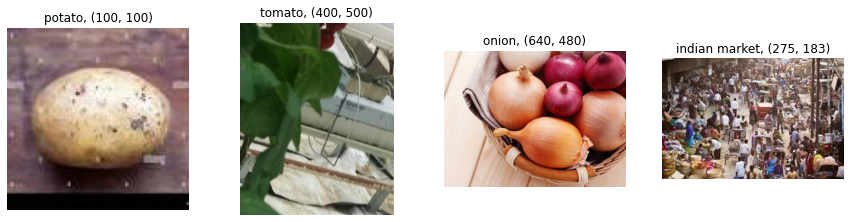

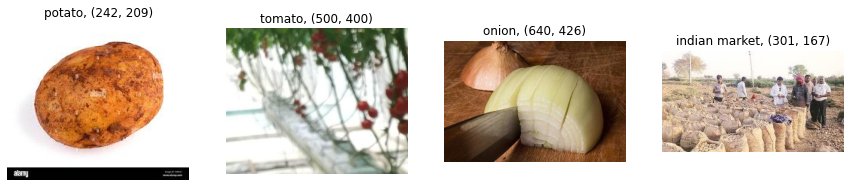

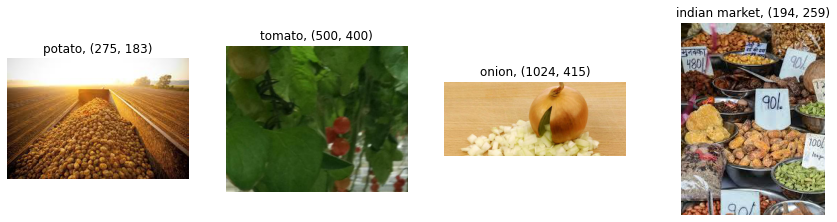

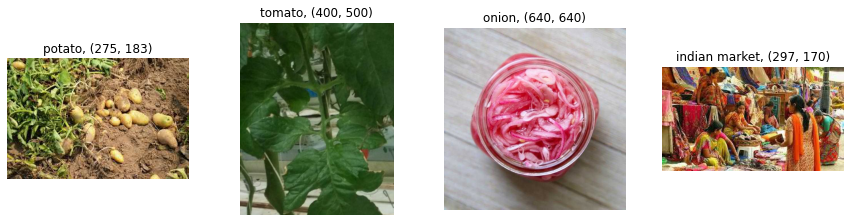

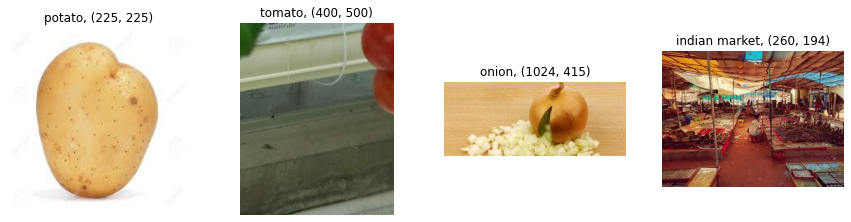




Count of test samples per class:
            class  count
0         potato     81
1         tomato    106
2          onion     83
3  indian market     81



CPU times: user 2.66 s, sys: 272 ms, total: 2.93 s
Wall time: 4.27 s


<Axes: title={'center': 'test Data Count per class'}, xlabel='class'>

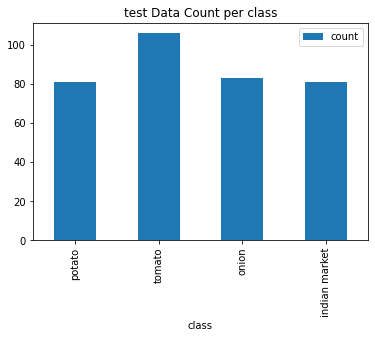

In [11]:

%%time


class_dirs_test = os.listdir("ninjacart_data/test") # list all directories inside "train" folder
image_dict_test = {} # dict to store image array(key) for every class(value)
count_dict_test = {} # dict to store count of files(key) for every class(value)

for _ in range(5):
  # iterate over all class_dirs_test
  for cls in class_dirs_test:
      # get list of all paths inside the subdirectory
      file_paths = glob.glob(f'ninjacart_data/test/{cls}/*')
      # count number of files in each class and add it to count_dict_test
      count_dict_test[cls] = len(file_paths)
      # select random item from list of image paths
      image_path = random.choice(file_paths)
      # load image using keras utility function and save it in image_dict
      image_dict_test[cls] = tf.keras.utils.load_img(image_path)
    
  ## Viz Random Sample from each class

  plt.figure(figsize=(15, 12))
  # iterate over dictionary items (class label, image array)
  for i, (cls,img) in enumerate(image_dict_test.items()):    
      # create a subplot axis
      ax = plt.subplot(3, 4, i + 1)
      # plot each image
      plt.imshow(img)
      # set "class name" along with "image size" as title 
      plt.title(f'{cls}, {img.size}')
      plt.axis("off")

  plt.show()

## Let's now Plot the Data Distribution of testing Data across Classes
df_count_test = pd.DataFrame({
    "class": count_dict_test.keys(),     # keys of count_dict are class labels
    "count": count_dict_test.values(),   # value of count_dict contain counts of each class
})

print()
print()
print()
print("Count of test samples per class:\n", df_count_test)

print()
print()
print()

# draw a bar plot using pandas in-built plotting function
df_count_test.plot.bar(x='class', y='count', title="test Data Count per class") 

In [53]:
# num_classes = 4
# hidden_size = 256

# model = keras.Sequential(
#     name="model_cnn",
#     layers=[
        
#         layers.Conv2D(filters=16, 
#                       kernel_size=3,
#                       strides=1, 
#                       padding="same", 
#                       activation='relu', 
#                       input_shape=(height, width, 3)),
            
#         layers.MaxPooling2D(),

#         layers.Conv2D(filters=64, kernel_size=3, padding="same", activation='relu'),
#         layers.MaxPooling2D(),
#         layers.Conv2D(filters=128, kernel_size=3, padding="same", activation='relu'),
#         layers.MaxPooling2D(),
#         layers.Conv2D(filters=256, kernel_size=3, padding="same", activation='relu'),

#         layers.GlobalAveragePooling2D(),

#         # layers.Flatten(),

#         layers.Dense(units=256, activation='relu'),
#         layers.Dense(units=num_classes, activation='softmax')
#     ]
# )

In [ ]:
# Loading, Resizing the data into TensorFlow 

In [12]:
import tensorflow as tf
import os
from sklearn.model_selection import train_test_split


In [13]:
train_dir = '/content/ninjacart_data/train'
test_dir = '/content/ninjacart_data/test'

train_filenames = tf.io.gfile.glob(train_dir + '/*/*')
test_filenames = tf.io.gfile.glob(test_dir + '/*/*')

train_labels = [os.path.basename(os.path.dirname(filename)) for filename in train_filenames]
test_labels = [os.path.basename(os.path.dirname(filename)) for filename in test_filenames]


In [14]:
np.unique(np.array(test_labels))

array(['indian market', 'onion', 'potato', 'tomato'], dtype='<U13')

In [15]:
train_filenames, val_filenames, train_labels, val_labels = train_test_split(train_filenames, train_labels, test_size=0.2)


In [16]:
data_dir = '/content/ninjacart_data/train'
img_size = (128, 128) # set the desired image size for your model


In [17]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_data_gen = ImageDataGenerator(
    rescale=1./255, # normalize pixel values
    validation_split=0.2 # set the validation split to 20%
)

train_data = train_data_gen.flow_from_directory(
    data_dir,
    target_size=img_size,
    batch_size=32, # set the batch size for training data
    class_mode='categorical',
    subset='training'
)

val_data = train_data_gen.flow_from_directory(
    data_dir,
    target_size=img_size,
    batch_size=32, # set the batch size for validation data
    class_mode='categorical',
    subset='validation'
)


Found 2511 images belonging to 4 classes.
Found 624 images belonging to 4 classes.


In [18]:
data_gen = ImageDataGenerator(
    rescale=1./255, # normalize pixel values

)



test_data = data_gen.flow_from_directory(
    test_dir,
    target_size=img_size,
    class_mode='categorical',
    shuffle=False  # don't shuffle the data
)

Found 351 images belonging to 4 classes.


In [21]:
height, width = img_size
height, width

(128, 128)

In [19]:
# Creating base ANN model : 

In [22]:
num_classes = 4
hidden_size_1 = 256
hidden_size_2 = 256


model = keras.Sequential(
    name="model_ANN",
    layers=[
        
        

        layers.Flatten(input_shape=(height, width, 3)),
        
        layers.Dense(units=hidden_size_1, activation='relu'), # hidden layer 1
        layers.Dense(units=hidden_size_2, activation='relu'), # hidden layer 2
        

        layers.Dense(units=num_classes, activation='softmax'), # output layer
    ]
)

model.summary()



Model: "model_ANN"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 49152)             0         
                                                                 
 dense (Dense)               (None, 256)               12583168  
                                                                 
 dense_1 (Dense)             (None, 256)               65792     
                                                                 
 dense_2 (Dense)             (None, 4)                 1028      
                                                                 
Total params: 12,649,988
Trainable params: 12,649,988
Non-trainable params: 0
_________________________________________________________________


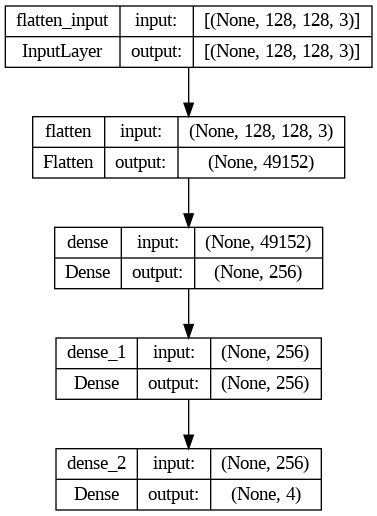

In [23]:

tf.keras.utils.plot_model(model, to_file="model_ANN.png", show_shapes=True)



In [26]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [27]:

epochs = 15
model_fit = model.fit(train_data,
                      steps_per_epoch=train_data.samples//train_data.batch_size, # set the steps per epoch
                      validation_data=val_data,
                      validation_steps=val_data.samples//val_data.batch_size, # set the validation steps
                      epochs=epochs)



Epoch 1/15
78/78 [==============================] - 19s 222ms/step - loss: 7.4552 - accuracy: 0.3897 - val_loss: 1.2296 - val_accuracy: 0.5329
Epoch 2/15
78/78 [==============================] - 18s 229ms/step - loss: 1.0211 - accuracy: 0.6370 - val_loss: 1.0521 - val_accuracy: 0.5789
Epoch 3/15
78/78 [==============================] - 22s 284ms/step - loss: 0.9280 - accuracy: 0.6478 - val_loss: 1.1942 - val_accuracy: 0.6036
Epoch 4/15
78/78 [==============================] - 25s 322ms/step - loss: 0.8190 - accuracy: 0.6914 - val_loss: 0.8565 - val_accuracy: 0.6875
Epoch 5/15
78/78 [==============================] - 20s 253ms/step - loss: 0.7475 - accuracy: 0.7168 - val_loss: 0.9300 - val_accuracy: 0.6250
Epoch 6/15
78/78 [==============================] - 25s 316ms/step - loss: 0.7467 - accuracy: 0.7039 - val_loss: 1.0266 - val_accuracy: 0.6086
Epoch 7/15
78/78 [==============================] - 17s 217ms/step - loss: 0.7729 - accuracy: 0.6846 - val_loss: 1.1354 - val_accuracy: 0.5740

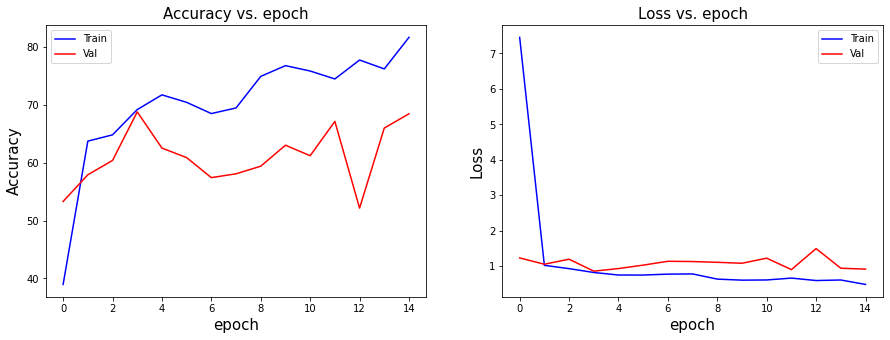

In [28]:
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(15,5))
ax = axes.ravel()

#accuracy graph
ax[0].plot(range(0,model_fit.params['epochs']), [acc * 100 for acc in model_fit.history['accuracy']], label='Train', color='b')
ax[0].plot(range(0,model_fit.params['epochs']), [acc * 100 for acc in model_fit.history['val_accuracy']], label='Val', color='r')
ax[0].set_title('Accuracy vs. epoch', fontsize=15)
ax[0].set_ylabel('Accuracy', fontsize=15)
ax[0].set_xlabel('epoch', fontsize=15)
ax[0].legend()

#loss graph
ax[1].plot(range(0,model_fit.params['epochs']), model_fit.history['loss'], label='Train', color='b')
ax[1].plot(range(0,model_fit.params['epochs']), model_fit.history['val_loss'], label='Val', color='r')
ax[1].set_title('Loss vs. epoch', fontsize=15)
ax[1].set_ylabel('Loss', fontsize=15)
ax[1].set_xlabel('epoch', fontsize=15)
ax[1].legend()

#display the graph
plt.show()

11/11 [==============================] - 2s 153ms/step - loss: 1.0572 - accuracy: 0.6154
Test accuracy: 0.6153846383094788


11/11 [==============================] - 2s 151ms/step
Confusion matrix:
[[27 19 29  6]
 [ 6 36 36  5]
 [10 13 57  1]
 [ 6  2  2 96]]
Classification report:
               precision    recall  f1-score   support

indian market       0.55      0.33      0.42        81
        onion       0.51      0.43      0.47        83
       potato       0.46      0.70      0.56        81
       tomato       0.89      0.91      0.90       106

     accuracy                           0.62       351
    macro avg       0.60      0.59      0.58       351
 weighted avg       0.62      0.62      0.61       351







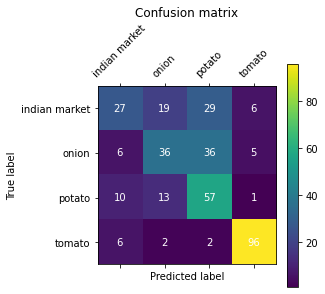

In [29]:
test_loss, test_acc = model.evaluate(test_data)


print('Test accuracy:', test_acc)

print()
print()


y_true = test_data.labels
y_pred = np.argmax(model.predict(test_data), axis=-1)

from sklearn.metrics import classification_report, confusion_matrix

cm = confusion_matrix(y_true, y_pred)



print('Confusion matrix:')
print(cm)

# Print the classification report
class_names = list(train_data.class_indices.keys())
report = classification_report(y_true, y_pred, target_names=class_names)
print('Classification report:')
print(report)

print()
print()
print()
print()


# Plot confusion matrix
plt.matshow(cm)
plt.title('Confusion matrix')
plt.colorbar()
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.xticks(np.arange(len(class_names)), class_names, rotation=45)
plt.yticks(np.arange(len(class_names)), class_names)


# Add text annotations to confusion matrix
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, cm[i, j], ha='center', va='center', color='white')

plt.show()

# CNN 


In [37]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

model = Sequential(
    
    name="model_CNN",
    layers = [
    

    Conv2D(filters = 32,
           kernel_size = (3, 3),
           activation='relu',
           padding="same" ,
           input_shape=(128, 128, 3)),
    MaxPooling2D((2, 2)),


    Conv2D(64,
           (3, 3),
           padding="same" ,
           activation='relu'),
    MaxPooling2D((2, 2)),


    Conv2D(128, 
           (3, 3),
           padding="same",
           activation='relu'),
    MaxPooling2D((2, 2)),

    
    Flatten(),


    Dense(128, activation='relu'),
    Dense(4, activation='softmax')
])




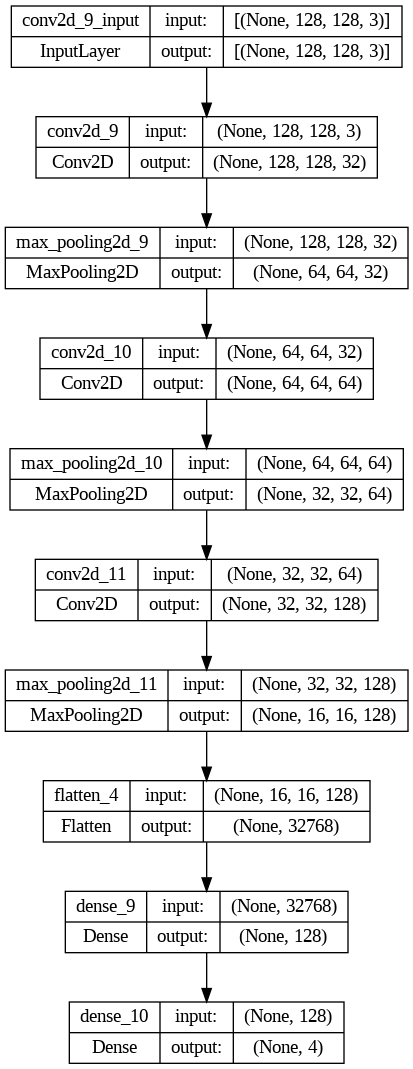

In [38]:
tf.keras.utils.plot_model(model, to_file="model_CNN.png", show_shapes=True)

In [36]:
model.summary()

Model: "model_CNN"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 128, 128, 32)      896       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 64, 64, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 64, 64, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 32, 32, 64)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 32, 32, 128)       73856     
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 16, 16, 128)      0 

In [ ]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [41]:
model_fit = model.fit(
    train_data,
    steps_per_epoch=train_data.samples//train_data.batch_size, # set the steps per epoch
    validation_data=val_data,
    validation_steps=val_data.samples//val_data.batch_size, # set the validation steps
    epochs=10 # set the number of epochs
)


Epoch 1/10
78/78 [==============================] - 19s 220ms/step - loss: 0.9302 - accuracy: 0.6168 - val_loss: 0.6767 - val_accuracy: 0.7385
Epoch 2/10
78/78 [==============================] - 15s 189ms/step - loss: 0.4770 - accuracy: 0.8161 - val_loss: 0.6175 - val_accuracy: 0.7632
Epoch 3/10
78/78 [==============================] - 16s 209ms/step - loss: 0.3917 - accuracy: 0.8528 - val_loss: 0.5281 - val_accuracy: 0.7862
Epoch 4/10
78/78 [==============================] - 17s 213ms/step - loss: 0.3382 - accuracy: 0.8697 - val_loss: 0.5281 - val_accuracy: 0.8109
Epoch 5/10
78/78 [==============================] - 16s 209ms/step - loss: 0.3170 - accuracy: 0.8745 - val_loss: 0.4418 - val_accuracy: 0.8240
Epoch 6/10
78/78 [==============================] - 16s 205ms/step - loss: 0.2280 - accuracy: 0.9117 - val_loss: 0.4180 - val_accuracy: 0.8503
Epoch 7/10
78/78 [==============================] - 15s 190ms/step - loss: 0.1912 - accuracy: 0.9266 - val_loss: 0.4427 - val_accuracy: 0.8355

In [42]:
test_loss, test_acc = model.evaluate(test_data)


print('Test accuracy:', test_acc)

print()
print()


y_true = test_data.labels
y_pred = np.argmax(model.predict(test_data), axis=-1)

from sklearn.metrics import classification_report, confusion_matrix

cm = confusion_matrix(y_true, y_pred)



print('Confusion matrix:')
print(cm)

# Print the classification report
class_names = list(train_data.class_indices.keys())
report = classification_report(y_true, y_pred, target_names=class_names)
print('Classification report:')
print(report)

print()
print()
print()
print()


# Plot confusion matrix
plt.matshow(cm)
plt.title('Confusion matrix')
plt.colorbar()
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.xticks(np.arange(len(class_names)), class_names, rotation=45)
plt.yticks(np.arange(len(class_names)), class_names)


# Add text annotations to confusion matrix
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, cm[i, j], ha='center', va='center', color='white')

plt.show()

11/11 [==============================] - 2s 145ms/step - loss: 0.5620 - accuracy: 0.8547


Test accuracy: 0.8547008633613586


11/11 [==============================] - 2s 146ms/step


Confusion matrix:
[[ 68   5   8   0]
 [  4  58  21   0]
 [  5   8  68   0]
 [  0   0   0 106]]
Classification report:
               precision    recall  f1-score   support

indian market       0.88      0.84      0.86        81
        onion       0.82      0.70      0.75        83
       potato       0.70      0.84      0.76        81
       tomato       1.00      1.00      1.00       106

     accuracy                           0.85       351
    macro avg       0.85      0.84      0.84       351
 weighted avg       0.86      0.85      0.86       351



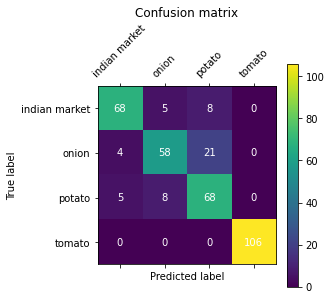

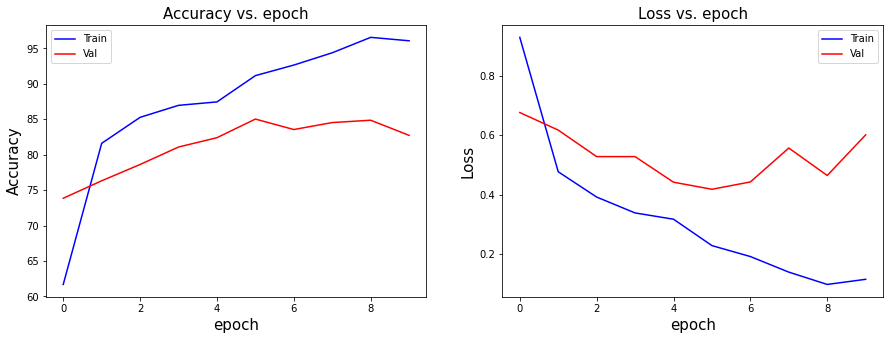

In [48]:
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(15, 5))
ax = axes.ravel()

#accuracy graph
ax[0].plot(range(0,model_fit.params['epochs']), [acc * 100 for acc in model_fit.history['accuracy']], label='Train', color='b')
ax[0].plot(range(0,model_fit.params['epochs']), [acc * 100 for acc in model_fit.history['val_accuracy']], label='Val', color='r')
ax[0].set_title('Accuracy vs. epoch', fontsize=15)
ax[0].set_ylabel('Accuracy', fontsize=15)
ax[0].set_xlabel('epoch', fontsize=15)
ax[0].legend()

#loss graph
ax[1].plot(range(0,model_fit.params['epochs']), model_fit.history['loss'], label='Train', color='b')
ax[1].plot(range(0,model_fit.params['epochs']), model_fit.history['val_loss'], label='Val', color='r')
ax[1].set_title('Loss vs. epoch', fontsize=15)
ax[1].set_ylabel('Loss', fontsize=15)
ax[1].set_xlabel('epoch', fontsize=15)
ax[1].legend()

#display the graph
plt.show()

In [54]:
# import tensorflow as tf
# from tensorflow.keras.preprocessing.image import ImageDataGenerator
# from tensorflow.keras import regularizers

# # Define data generators for training and validation data
# train_datagen = ImageDataGenerator(
#     rescale=1./255,
#     validation_split=0.2,  # Set validation split to 20%
#     rotation_range=20,  # Rotate images randomly by up to 20 degrees
#     width_shift_range=0.1,  # Shift images horizontally by up to 10% of the width
#     height_shift_range=0.1,  # Shift images vertically by up to 10% of the height
#     horizontal_flip=True,  # Flip images horizontally
#     vertical_flip=False,  # Don't flip images vertically
#     # Other data augmentation parameters (e.g., zoom_range, shear_range, etc.)
# )

# train_generator = train_datagen.flow_from_directory(
#     'path/to/training/folder',
#     target_size=(img_height, img_width),
#     batch_size=batch_size,
#     class_mode='categorical',
#     subset='training',  # Set subset to 'training' for training data
#     shuffle=True,  # Shuffle the training data
# )

# validation_generator = train_datagen.flow_from_directory(
#     'path/to/training/folder',
#     target_size=(img_height, img_width),
#     batch_size=batch_size,
#     class_mode='categorical',
#     subset='validation',  # Set subset to 'validation' for validation data
#     shuffle=True,  # Shuffle the validation data
# )

# # Define the model with regularisation
# model = tf.keras.Sequential([
#     tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(img_height, img_width, 3),
#                            kernel_regularizer=regularizers.l2(0.001)),
#     tf.keras.layers.MaxPooling2D((2, 2)),
#     tf.keras.layers.Conv2D(64, (3, 3), activation='relu',
#                            kernel_regularizer=regularizers.l2(0.001)),
#     tf.keras.layers.MaxPooling2D((2, 2)),
#     tf.keras.layers.Conv2D(128, (3, 3), activation='relu',
#                            kernel_regularizer=regularizers.l2(0.001)),
#     tf.keras.layers.MaxPooling2D((2, 2)),
#     tf.keras.layers.Flatten(),
#     tf.keras.layers.Dense(128, activation='relu',
#                           kernel_regularizer=regularizers.l2(0.001)),
#     tf.keras.layers.Dropout(0.5),  # Add dropout regularization
#     tf.keras.layers.Dense(num_classes, activation='softmax')
# ])

# # Compile the model
# model.compile(optimizer='adam',
#               loss='categorical_crossentropy',
#               metrics=['accuracy'])

# # Train the model using the data generators
# model.fit(
#     train_generator,
#     steps_per_epoch=train_generator.samples // batch_size,
#     epochs=num_epochs,
#     validation_data=validation_generator,
#     validation_steps=validation_generator.samples // batch_size
# )


In [42]:
import os
import numpy as np
import tensorflow as tf
tf.keras.utils.set_random_seed(111)
from tensorflow import keras
from tensorflow.keras import layers, regularizers
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.metrics as metrics
%matplotlib inline

In [48]:
# helper function to annotate maximum values in the plots
def annot_max(x,y, xytext=(0.94,0.96), ax=None, only_y=True):
    xmax = x[np.argmax(y)]
    ymax = max(y)
    if only_y:
        text = "{:.2f}%".format(ymax)
    else:
        text= "x={:.2f}, y={:.2f}%".format(xmax, ymax)
    if not ax:
        ax=plt.gca()
    bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
    arrowprops=dict(arrowstyle="->",connectionstyle="angle,angleA=0,angleB=60")
    kw = dict(xycoords='data',textcoords="axes fraction",
              arrowprops=arrowprops, bbox=bbox_props, ha="right", va="top")
    ax.annotate(text, xy=(xmax, ymax), xytext=xytext, **kw)

def plot_accuracy(model_fit):
    #accuracy graph
    x = range(0,len(model_fit.history['accuracy']))
    y_train = [acc * 100 for acc in model_fit.history['accuracy']]
    y_val = [acc * 100 for acc in model_fit.history['val_accuracy']]

    plt.plot(x, y_train, label='Train', color='b')
    annot_max(x, y_train, xytext=(0.7,0.9))
    plt.plot(x, y_val, label='Val', color='r')
    annot_max(x, y_val, xytext=(0.8,0.7))
    plt.ylabel('Accuracy', fontsize=15)
    plt.xlabel('epoch', fontsize=15)
    plt.legend()
    plt.show()
    

In [43]:
def architecture_2(height=128, width=128,num_classes=4):
    hidden_size = 256

    model = keras.Sequential(
        name="model_cnn_3",
        layers=[
            layers.Conv2D(filters=16, 
                          kernel_size=3, 
                          padding="same", 
                          input_shape=(height, width, 3),
                            kernel_regularizer=regularizers.l2(1e-3)),
            layers.Activation("relu"),
            layers.BatchNormalization(),
            layers.MaxPooling2D(),
            layers.Conv2D(filters=32, kernel_size=3, padding="same",
                            kernel_regularizer=regularizers.l2(1e-3)),
            layers.Activation("relu"),
            layers.BatchNormalization(),
            layers.MaxPooling2D(),
            layers.Conv2D(filters=64, kernel_size=3, padding="same",
                            kernel_regularizer=regularizers.l2(1e-3)),
            layers.Activation("relu"),
            layers.BatchNormalization(),
            layers.MaxPooling2D(),
            layers.Conv2D(filters=128, kernel_size=3, padding="same",
                            kernel_regularizer=regularizers.l2(1e-3)),
            layers.Activation("relu"),
            layers.BatchNormalization(),
            layers.MaxPooling2D(),
            layers.Conv2D(filters=256, kernel_size=3, padding="same",
                            kernel_regularizer=regularizers.l2(1e-3)),
            layers.Activation("relu"),
            layers.BatchNormalization(),
            # layers.MaxPooling2D(),
            # layers.Flatten(),
            layers.GlobalAveragePooling2D(),
            layers.Dense(units=hidden_size, kernel_regularizer=regularizers.l2(1e-3)),
            layers.Activation("relu"),
            layers.BatchNormalization(),
            layers.Dropout(0.5),
            layers.Dense(units=num_classes, activation='softmax')
        ]
    )
    return model

In [44]:
model = architecture_2()
model.summary()

Model: "model_cnn_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 128, 128, 16)      448       
                                                                 
 activation (Activation)     (None, 128, 128, 16)      0         
                                                                 
 batch_normalization (BatchN  (None, 128, 128, 16)     64        
 ormalization)                                                   
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 64, 64, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 64, 64, 32)        4640      
                                                                 
 activation_1 (Activation)   (None, 64, 64, 32)        

In [45]:
def compile_train_v2(model, train_ds, val_ds, epochs=10, ckpt_path="/tmp/checkpoint"):
    callbacks = [
        keras.callbacks.ReduceLROnPlateau(
            monitor="val_loss", factor=0.3, patience=5, min_lr=0.00001
        ),
        keras.callbacks.ModelCheckpoint(ckpt_path, save_weights_only=True, monitor='val_accuracy', mode='max', save_best_only=True),
        keras.callbacks.EarlyStopping(
            monitor="val_loss", patience=10, min_delta=0.001, mode='min'
        )
    ]
    model.compile(optimizer='adam',
                loss='categorical_crossentropy',
                metrics=['accuracy'])
    model_fit = model.fit(train_ds, validation_data=val_ds, epochs=epochs, callbacks=callbacks)
    return model_fit

In [46]:
model_fit = compile_train_v2(model, train_data, val_data, epochs=100)

Epoch 1/100
79/79 [==============================] - 57s 252ms/step - loss: 1.4031 - accuracy: 0.7316 - val_loss: 2.0937 - val_accuracy: 0.2885 - lr: 0.0010
Epoch 2/100
79/79 [==============================] - 16s 198ms/step - loss: 1.1507 - accuracy: 0.7905 - val_loss: 3.3518 - val_accuracy: 0.2869 - lr: 0.0010
Epoch 3/100
79/79 [==============================] - 15s 193ms/step - loss: 1.0578 - accuracy: 0.8108 - val_loss: 3.3650 - val_accuracy: 0.2869 - lr: 0.0010
Epoch 4/100
79/79 [==============================] - 17s 217ms/step - loss: 0.9789 - accuracy: 0.8395 - val_loss: 3.1273 - val_accuracy: 0.3974 - lr: 0.0010
Epoch 5/100
79/79 [==============================] - 15s 197ms/step - loss: 0.9097 - accuracy: 0.8423 - val_loss: 1.6772 - val_accuracy: 0.6362 - lr: 0.0010
Epoch 6/100
79/79 [==============================] - 15s 188ms/step - loss: 0.8235 - accuracy: 0.8686 - val_loss: 1.1002 - val_accuracy: 0.7324 - lr: 0.0010
Epoch 7/100
79/79 [==============================] - 15s 1

In [ ]:
# model_fit = model.fit(
#     train_data,
#     steps_per_epoch=train_data.samples//train_data.batch_size, # set the steps per epoch
#     validation_data=val_data,
#     validation_steps=val_data.samples//val_data.batch_size, # set the validation steps
#     epochs=10 # set the number of epochs
# )


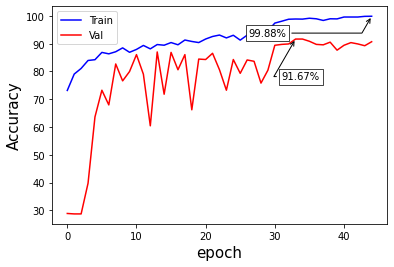

In [49]:
plot_accuracy(model_fit)

11/11 [==============================] - 4s 315ms/step - loss: 0.6415 - accuracy: 0.8490
Test accuracy: 0.8490028381347656


11/11 [==============================] - 2s 149ms/step
Confusion matrix:
[[ 58  17   5   1]
 [  2  70  11   0]
 [  3  14  64   0]
 [  0   0   0 106]]
Classification report:
               precision    recall  f1-score   support

indian market       0.92      0.72      0.81        81
        onion       0.69      0.84      0.76        83
       potato       0.80      0.79      0.80        81
       tomato       0.99      1.00      1.00       106

     accuracy                           0.85       351
    macro avg       0.85      0.84      0.84       351
 weighted avg       0.86      0.85      0.85       351







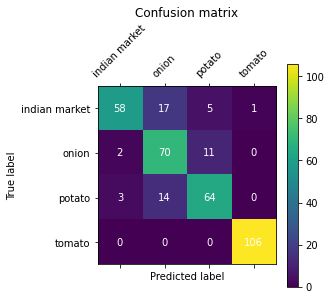

In [50]:
test_loss, test_acc = model.evaluate(test_data)


print('Test accuracy:', test_acc)

print()
print()


y_true = test_data.labels
y_pred = np.argmax(model.predict(test_data), axis=-1)

from sklearn.metrics import classification_report, confusion_matrix

cm = confusion_matrix(y_true, y_pred)



print('Confusion matrix:')
print(cm)

# Print the classification report
class_names = list(train_data.class_indices.keys())
report = classification_report(y_true, y_pred, target_names=class_names)
print('Classification report:')
print(report)

print()
print()
print()
print()


# Plot confusion matrix
plt.matshow(cm)
plt.title('Confusion matrix')
plt.colorbar()
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.xticks(np.arange(len(class_names)), class_names, rotation=45)
plt.yticks(np.arange(len(class_names)), class_names)


# Add text annotations to confusion matrix
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, cm[i, j], ha='center', va='center', color='white')

plt.show()